In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import math
from pandas.plotting import scatter_matrix

In [3]:
data = pd.read_csv("stock_data_performance_fundamentals_300.csv", index_col=0)
x = data.drop(columns='Perf')
y = data['Perf']

# First Standard Scaler

In [4]:
x.describe()

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,10.723351,0.260785,18.061302,5.034919,8.825682,30.553998,2.507297,0.087411,0.135981,3.058334,2.512936,1.217449,30.407290,0.491053
std,72.215214,0.809383,54.378952,13.035311,49.938987,206.738424,2.176221,0.847172,0.142394,11.049073,1.992864,2.046078,196.059732,0.257682
min,-500.000000,-5.000000,-500.000000,-50.000000,0.000810,-200.000000,0.051627,-5.000000,0.000000,0.000000,0.487378,0.003299,0.000000,0.000000
25%,7.655582,0.070594,9.355681,1.693638,0.906209,-1.509469,1.247292,0.024674,0.037945,0.503998,1.450366,0.181262,2.625409,0.288585
50%,12.956057,0.223177,17.356074,2.868679,1.796910,3.674477,1.916651,0.107910,0.110295,1.004943,1.931926,0.531027,6.568302,0.457263
75%,19.509391,0.418362,25.520310,4.788118,4.062314,16.537313,2.978365,0.209479,0.181868,2.001237,2.769044,1.372320,13.199795,0.655422
max,500.000000,5.000000,359.767138,100.000000,500.000000,800.000000,15.224228,5.000000,1.042717,100.000000,14.806901,15.093623,2000.000000,1.000000


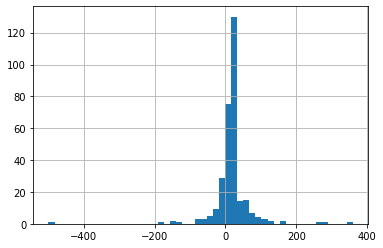

In [5]:
myKey = x.keys()[2]
x[myKey].hist(bins=50)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Create Standard Scaler Object
x_s=scaler.fit_transform(x) # Fit the scaler, this returns a numpy array
x_s = pd.DataFrame(x_s, columns=x.keys())

In [7]:
x_s.describe()

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin
count,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02
mean,8.623091e-18,-3.161800e-17,8.623091e-18,1.006027e-16,-5.748728e-18,2.874364e-17,-8.048219e-17,-1.724618e-17,1.322207e-16,2.874364e-18,-2.874364e-18,-2.299491e-17,-8.623091e-18,-4.110340e-16
std,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00
min,-7.083712e+00,-6.510290e+00,-9.542325e+00,-4.228836e+00,-1.769997e-01,-1.117006e+00,-1.130240e+00,-6.014913e+00,-9.565149e-01,-2.772445e-01,-1.018054e+00,-5.943662e-01,-1.553435e-01,-1.908747e+00
25%,-4.254984e-02,-2.353633e-01,-1.603514e-01,-2.567412e-01,-1.588402e-01,-1.553435e-01,-5.799269e-01,-7.417551e-02,-6.896044e-01,-2.315560e-01,-5.340527e-01,-5.072473e-01,-1.419310e-01,-7.870019e-01
50%,3.096754e-02,-4.654091e-02,-1.298982e-02,-1.664521e-01,-1.409755e-01,-1.302280e-01,-2.718491e-01,2.423638e-02,-1.806786e-01,-1.861442e-01,-2.920183e-01,-3.360261e-01,-1.217877e-01,-1.313440e-01
75%,1.218620e-01,1.950033e-01,1.373897e-01,-1.896404e-02,-9.553847e-02,-6.790910e-02,2.168127e-01,1.443229e-01,3.227734e-01,-9.582809e-02,1.287208e-01,7.581446e-02,-8.790896e-02,6.389134e-01
max,6.786247e+00,5.864840e+00,6.293981e+00,7.297035e+00,9.851442e+00,3.727871e+00,5.853062e+00,5.808218e+00,6.378127e+00,8.787969e+00,6.179000e+00,6.792842e+00,1.006218e+01,1.978304e+00


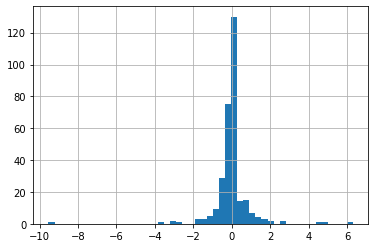

In [8]:
x_s[myKey].hist(bins=50)

### Side-by-side

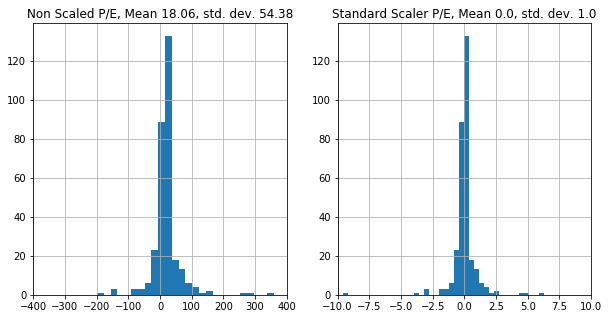

In [9]:
myKey = x.keys()[2]# Can change key number, 2 is P/E ratios

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
x[myKey].hist(bins=40)
plt.title('Non Scaled {}, Mean {}, std. dev. {}'.format(myKey, round(x[myKey].mean(),2), round(x[myKey].std(),2)))
plt.xlim([-400, 400]);

plt.subplot(1,2,2)
x_s[myKey].hist(bins=40)
plt.title('Standard Scaler {}, Mean {}, std. dev. {}'.format(myKey, round(x_s[myKey].mean(),2), round(x_s[myKey].std(),2)))
plt.xlim([-10, 10]);

### Sometimes need more than just transform

Text(0.5, 1.0, 'Standard Scaler P/S, Mean -0.0, std. dev. 1.0')

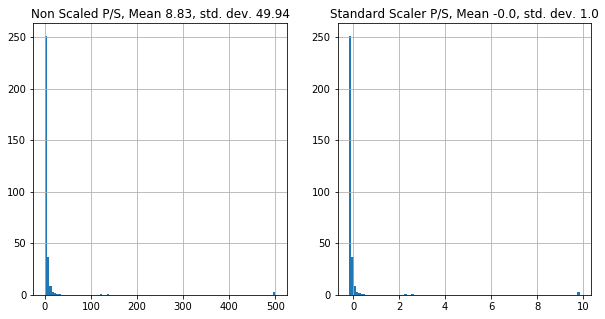

In [10]:
myKey = x.keys()[4]#P/S ratios

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
x[myKey].hist(bins=100)
plt.title('Non Scaled {}, Mean {}, std. dev. {}'.format(myKey, round(x[myKey].mean(),2), round(x[myKey].std(),2)))
#plt.xlim([-400, 400]);

plt.subplot(1,2,2)
x_s[myKey].hist(bins=100)
plt.title('Standard Scaler {}, Mean {}, std. dev. {}'.format(myKey, round(x_s[myKey].mean(),2), round(x_s[myKey].std(),2)))
#plt.xlim([-10, 10]);

# Now Power Transformer

In [11]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
x_t=transformer.fit_transform(x)

In [12]:
x_t = pd.DataFrame(x_t)
x_t.columns = x.keys()
x_t.describe()

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin
count,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02,3.090000e+02
mean,1.976125e-17,1.006027e-17,1.149746e-17,-2.586927e-17,-1.264720e-16,2.874364e-17,8.048219e-17,2.012055e-17,-1.063515e-16,-1.437182e-16,-5.554708e-16,1.322207e-16,-5.605009e-17,-1.954567e-16
std,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00,1.001622e+00
min,-4.666798e+00,-6.152331e+00,-6.866186e+00,-7.225347e+00,-2.123225e+00,-1.670513e+00,-2.817441e+00,-6.409626e+00,-1.412803e+00,-2.021353e+00,-3.273747e+00,-1.537596e+00,-2.080271e+00,-2.284288e+00
25%,-1.606858e-01,-2.460108e-01,-2.399667e-01,-2.176444e-01,-6.821066e-01,2.436966e-02,-6.260128e-01,-6.289467e-02,-8.037873e-01,-7.101218e-01,-6.788895e-01,-8.845858e-01,-5.907263e-01,-7.595934e-01
50%,-6.886968e-02,-5.740856e-02,-7.871555e-02,-1.170746e-01,-3.413085e-02,5.394448e-02,-1.932686e-02,3.585148e-02,7.343620e-02,-2.026389e-02,-4.305365e-02,-7.368621e-02,1.176927e-01,-3.692759e-02
75%,4.904618e-02,1.854570e-01,9.013858e-02,4.031670e-02,7.384479e-01,1.170149e-01,6.225086e-01,1.558302e-01,6.839856e-01,7.075881e-01,6.608894e-01,8.416158e-01,6.532551e-01,7.005282e-01
max,1.089841e+01,6.150506e+00,7.836157e+00,6.155158e+00,2.616214e+00,3.018529e+00,2.685986e+00,5.517541e+00,2.437418e+00,2.434367e+00,2.419714e+00,2.057657e+00,3.286654e+00,1.773018e+00


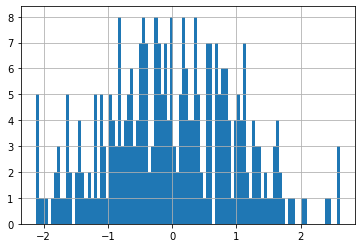

In [13]:
x_t[myKey].hist(bins=100)

# Have a look at scaling and transforming

Text(0.5, 1.0, 'Power Transformer P/S, Mean -0.0, std. dev. 1.0')

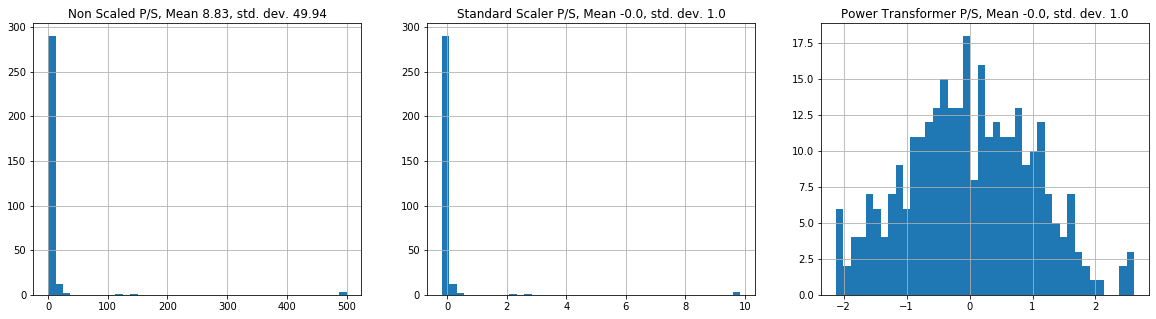

In [14]:
myKey = x.keys()[4] #4

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
x[myKey].hist(bins=40)
plt.title('Non Scaled {}, Mean {}, std. dev. {}'.format(myKey, round(x[myKey].mean(),2), round(x[myKey].std(),2)))

plt.subplot(1,3,2)
x_s[myKey].hist(bins=40)
plt.title('Standard Scaler {}, Mean {}, std. dev. {}'.format(myKey, round(x_s[myKey].mean(),2), round(x_s[myKey].std(),2)))

plt.subplot(1,3,3)
x_t[myKey].hist(bins=40)
plt.title('Power Transformer {}, Mean {}, std. dev. {}'.format(myKey, round(x_t[myKey].mean(),2), round(x_t[myKey].std(),2)))

# Pipeline Example
To use a transformer with Scikit-Learn, it is easier to assemble your transformations into a pipeline.

In [22]:
data = pd.read_csv('stock_data_performance_fundamentals_300.csv', index_col=0) # Read in our data
X=data.drop(columns='Perf')
Y=data['Perf']
X.keys()
data

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,Perf
3400,6.381478,0.204089,10.875822,1.955389,1.043914,507.500000,1.683476,0.179792,0.205403,0.746217,2.340092,0.489970,1.896559,0.315558,0.055388
12853,13.063094,0.320015,18.033607,2.593587,2.290410,23.015477,2.739353,0.143820,0.143781,0.619297,2.614733,1.013029,4.911931,0.512353,0.112595
11564,22.946430,0.049592,-11.771037,2.470096,0.154558,0.518199,2.304271,-0.209845,0.043381,6.343013,1.157654,0.384641,9.211404,0.057980,0.947340
6584,9.117308,0.124919,12.254908,100.000000,0.406767,-200.000000,1.989239,5.000000,0.115158,100.000000,1.003977,0.179304,7.571732,0.082257,0.032850
2810,-41.561149,0.418362,20.870461,0.850370,1.098445,39.277419,1.379839,0.040745,0.039916,3.682290,1.271570,1.117836,26.533528,1.000000,-0.015705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9214,21.461040,0.036303,20.309411,1.793981,12.817430,2.809127,0.604215,0.088333,0.070467,0.576044,2.735978,0.328058,0.120212,0.723214,0.169849
1376,-21.407259,-2.582705,-14.228557,-2.784882,14.018114,-11.573254,1.541922,0.195725,0.000000,0.000000,0.506417,1.348292,2000.000000,1.000000,0.000000
12271,83.872250,0.206788,264.203623,8.092658,5.539071,5.883443,3.393044,0.030630,0.047751,1.283017,1.779413,2.469547,10.592194,0.954896,0.216996
1667,16.013022,0.440090,21.299313,2.966533,1.675231,3.483937,2.672773,0.139278,0.088632,2.873834,1.347967,0.140174,5.670638,0.321984,0.194558


In [23]:
# Use scikitlearn to do linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer

my_rand_state = 42 # Try and random state for splitting the data and see the difference in test error.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=my_rand_state)

In [24]:
#Standard Linear Regressor
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)

print('train error', mean_squared_error(y_train, linearRegressor.predict(X_train)))
print('test error', mean_squared_error(y_test, linearRegressor.predict(X_test)))

train error 0.25596952740060863
test error 0.1478164012720238


In [28]:
#Standard Linear Regressor With PowerTransformer Pipeline
pl_linear = Pipeline([
    ('PowerTransformer', PowerTransformer()),
    ('linear', LinearRegression())
])

pl_linear.fit(X_train, y_train)

print('train error', mean_squared_error(y_train, pl_linear.predict(X_train)))
print('test error', mean_squared_error(y_test, pl_linear.predict(X_test)))

train error 0.2623233238134826
test error 0.12394151376001815
